In [1]:
import numpy as np
import nibabel as nib
import pandas as pd

from nilearn import plotting, image
from nilearn.masking import apply_mask, unmask

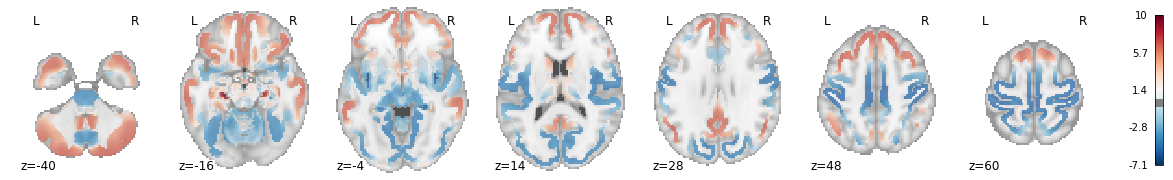

In [2]:
# Load first gradient image (from Margulies et al., 2016)

gradient_img = nib.load('volume.all.0.nii.gz')
plotting.plot_roi(gradient_img, cmap='RdBu_r', colorbar=True, display_mode='z')

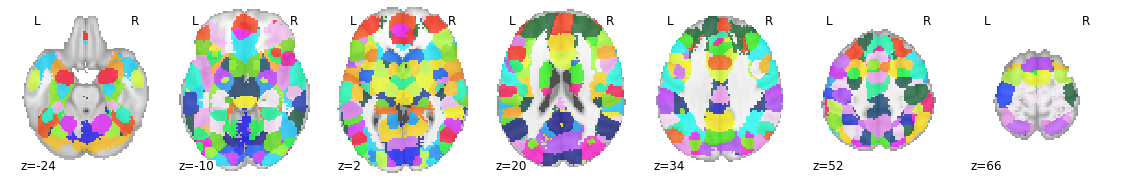

In [3]:
# Load neurosynth parcellation (200-parcel version)

nsparc_img = nib.load('Neurosynth_Parcellation_k200.nii.gz')
plotting.plot_roi(nsparc_img, display_mode='z')

In [4]:
gradient_data = gradient_img.get_fdata().squeeze()
print(gradient_data.shape)

nsparc_data = nsparc_img.get_fdata().squeeze()
print(nsparc_data.shape)

(91, 109, 91)
(91, 109, 91)


In [5]:
nsparc_affine = nsparc_img.affine

nsparc_data = np.round(nsparc_data) # round all values to integers
print(len(np.unique(nsparc_data)))
np.unique(nsparc_data)

201


array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

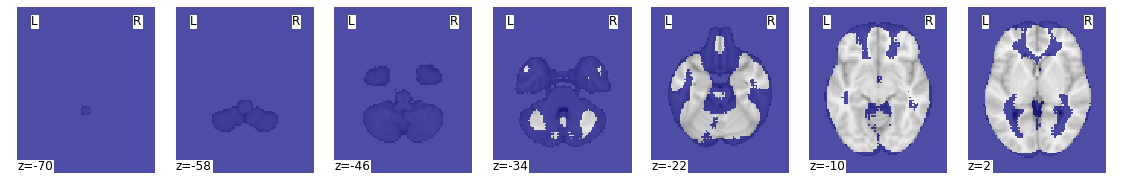

In [6]:
# Verify that parcels are 1-indexed

singleparc_no = 0

singleparc = np.zeros(nsparc_data.shape)
singleparc[nsparc_data==singleparc_no] = 1

singleparc_img = nib.Nifti1Image(singleparc, nsparc_affine)
plotting.plot_roi(singleparc_img, display_mode='z')

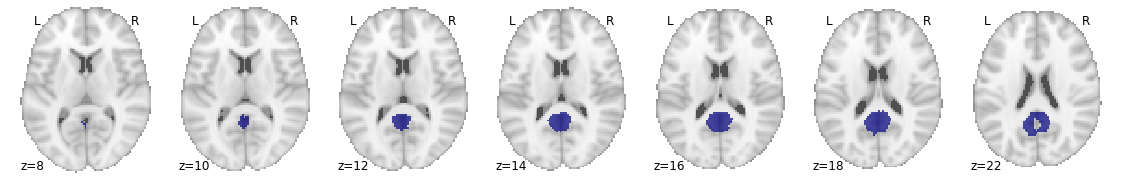

In [7]:
singleparc_no = 1

singleparc = np.zeros(nsparc_data.shape)
singleparc[nsparc_data==singleparc_no] = 1

singleparc_img = nib.Nifti1Image(singleparc, nsparc_affine)
plotting.plot_roi(singleparc_img, display_mode='z')

In [8]:
# Assign gradient values to each parcel

gradient_assignment = []

for parc in np.arange(1,201): # for each parcel
    all_voxels = gradient_data[nsparc_data==parc] # mask gradient image with this parcel
    gradient_assignment.append(np.mean(all_voxels[all_voxels > 0])) # save mean of nonzero values

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [9]:
gradient_assignment

[4.974395467281192,
 nan,
 4.807368403507604,
 nan,
 1.9707685312795329,
 2.0884531665107477,
 nan,
 3.586845534901223,
 6.525448125810479,
 2.7959474675033404,
 1.5139283919059496,
 5.291629673729814,
 nan,
 nan,
 0.5353696239775324,
 2.9763153820919492,
 1.1001681600678332,
 2.6023846963886172,
 6.218695893487096,
 nan,
 5.192194702847706,
 1.4973544803839447,
 nan,
 0.6351725711160666,
 nan,
 3.5532016900547765,
 1.5088151693344116,
 2.469993892027667,
 nan,
 1.9238012186066549,
 3.0753950439462905,
 nan,
 nan,
 0.07171899080276489,
 nan,
 4.712566227333852,
 3.491546280983351,
 1.767466853497793,
 0.8891830038046464,
 0.29833632707595825,
 5.044140499207831,
 5.768064394662547,
 0.20768402516841888,
 3.515955965703642,
 nan,
 nan,
 1.964157040908117,
 2.3506869542380344,
 nan,
 6.2802660910288495,
 3.712606685335881,
 6.134489520687923,
 nan,
 1.4330760098473971,
 1.582640826702118,
 1.851980560051921,
 0.6444564839968314,
 1.3626290384680033,
 4.4053915851825,
 nan,
 0.26489781588

In [10]:
np.isnan(gradient_assignment).sum()

44

Seems like 44 parcels don't have any overlap with the gradient image (likely because the gradient image is a pretty narrow ribbon). Could just ignore these nodes, or try dilating the gradient image if we think this is a big issue.

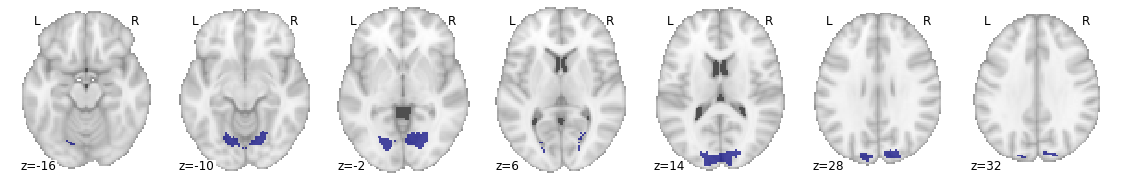

In [11]:
singleparc_no = 2

singleparc = np.zeros(nsparc_data.shape)
singleparc[nsparc_data==singleparc_no] = 1

singleparc_img = nib.Nifti1Image(singleparc, nsparc_affine)
plotting.plot_roi(singleparc_img, display_mode='z')

In [12]:
# Save
pd.Series(gradient_assignment, name='gradient_assignment').to_csv('nsparc200_gradient_mapping.csv')